## Generating Dataset

In [ ]:
import os
import pandas as pd
import shutil

In [ ]:
path = './cifar10/train/train'

In [ ]:
images = os.listdir(path)


In [ ]:
labels_path = './cifar10/trainLabels.csv'

In [ ]:
labels = pd.read_csv(labels_path , index_col ="id")
labels.head()
labels.iloc[1]

In [ ]:
for image in images:
    image_name = int(image[:-4])
    if labels.loc[image_name].label == "ship":
        shutil.copy(f'{path}/{image}' , './cifar10/train/ships')
    
    elif labels.loc[image_name].label == "truck":
        shutil.copy(f'{path}/{image}' , './cifar10/train/trucks')
        
    

In [ ]:
len(os.listdir('./dataset/ships'))

## creating pytorch Dataset and DataLoader

In [21]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms

In [22]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [23]:
trainset=datasets.ImageFolder(root="./dataset/train" , transform = transform)
testset=datasets.ImageFolder(root="./dataset/test" , transform = transform)

In [24]:
trainset

Dataset ImageFolder
    Number of datapoints: 10000
    Root location: ./dataset/train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [25]:
testset

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: ./dataset/test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 4

In [27]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [28]:
classes = ( 'ship' , 'truck' )

tensor([0, 1, 1, 1])


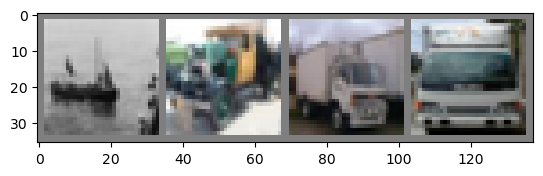

 ship truck truck truck


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

## Model and Hyperparameters

In [30]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    


net = Net()

In [31]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [32]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [33]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.000
[1,   201] loss: 0.069
[1,   401] loss: 0.068
[1,   601] loss: 0.064
[1,   801] loss: 0.058
[1,  1001] loss: 0.056
[1,  1201] loss: 0.053
[1,  1401] loss: 0.048
[1,  1601] loss: 0.042
[1,  1801] loss: 0.041
[1,  2001] loss: 0.040
[1,  2201] loss: 0.039
[1,  2401] loss: 0.037
[2,     1] loss: 0.000
[2,   201] loss: 0.039
[2,   401] loss: 0.035
[2,   601] loss: 0.032
[2,   801] loss: 0.037
[2,  1001] loss: 0.031
[2,  1201] loss: 0.032
[2,  1401] loss: 0.030
[2,  1601] loss: 0.032
[2,  1801] loss: 0.028
[2,  2001] loss: 0.030
[2,  2201] loss: 0.027
[2,  2401] loss: 0.032
[3,     1] loss: 0.001
[3,   201] loss: 0.027
[3,   401] loss: 0.030
[3,   601] loss: 0.023
[3,   801] loss: 0.024
[3,  1001] loss: 0.026
[3,  1201] loss: 0.025
[3,  1401] loss: 0.029
[3,  1601] loss: 0.023
[3,  1801] loss: 0.027
[3,  2001] loss: 0.023
[3,  2201] loss: 0.026
[3,  2401] loss: 0.027
[4,     1] loss: 0.000
[4,   201] loss: 0.020
[4,   401] loss: 0.021
[4,   601] loss: 0.029
[4,   801] 

In [34]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## Testing and Prediction

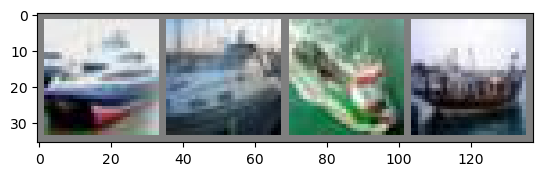

GroundTruth:   ship  ship  ship  ship


In [35]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [36]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [37]:
outputs = net(images)
print(outputs.shape)
_, predicted = torch.max(outputs , 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

torch.Size([4, 2])
Predicted:   ship  ship  ship  ship


In [38]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class ship  is: 92.3 %
Accuracy for class truck is: 91.8 %
